In [1]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [2]:
%run 'cross_validation/functions.ipynb'

Index(['time', 'cruise', 'lat', 'lon', 'biomass', 'sss', 'sst', 'ugos', 'vgos',
       'Fe', 'O2', 'NO3', 'PO4', 'Si', 'ALK', 'hours_since_sunrise'],
      dtype='object')
(4679, 11)
<class 'numpy.ndarray'>
(4679,)


In [3]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [4]:
import plotly.graph_objects as go

hyperparameters = {'n_estimators': 200, 'max_depth': 12, 'max_features': 'sqrt'}

def predict_cruise(hyperparameters):
    model_training(train_features, train_labels, test_features, test_labels, hyperparameters)
    predictions, maes, rmses, rmse = predict_kfold(test_features, test_labels, train_labels, train_features)
    merged_df = covari_predictions(predictions)
    
    # plot the prediction for KM2010
    fig = go.Figure()
    cruise_df = merged_df[merged_df['cruise'] == 'KM2010']
    fig.add_trace(go.Scatter(x=cruise_df['time'], y=cruise_df['biomass'], mode='markers', name='Actual' , marker=dict(color='blue')))
    fig.add_trace(go.Scatter(x=cruise_df['time'], y=cruise_df['prediction'], mode='lines', name='Prediction',
                                line=dict(color='red')))
    fig.update_layout(title='KM2010', xaxis_title='Time', yaxis_title='Biomass')
    fig.show()

In [5]:
def feature_importance():
    feature_importance = []
    for f in fold:
        rf = joblib.load(f"RF_models/pro_random_forest_fold_{f}.joblib")
        feat_importance = pd.DataFrame(rf.feature_importances_, index=feature_list_pro).sort_values(by=0, ascending=False)
        feature_importance.append(feat_importance)
    feature_importance = pd.concat(feature_importance, axis=1, keys=fold,)
    # Import matplotlib for plotting and use magic command for Jupyter Notebooks
    import matplotlib.pyplot as plt
    %matplotlib inline
    feature_importance.columns = feature_importance.columns.droplevel(1)
    print(feature_importance)
    print(type(feature_importance))
        


    fig, axs = plt.subplots(4, 2, figsize=(10, 20))
    axs = axs.flatten()


    for i, f in enumerate(fold):
        # Sort the data in descending order and plot
        feature_importance[f].sort_values(ascending=False).plot(kind='bar', ax=axs[i])
        axs[i].set_title(f'Fold {f+1}')


    plt.tight_layout()
    plt.show()
    

In [6]:
predict_cruise(hyperparameters)

                            0         1         2         3         4  \
sst                  0.169416  0.172745  0.189226  0.157890  0.149728   
ALK                  0.165904  0.161644  0.165181  0.146511  0.158847   
hours_since_sunrise  0.165232  0.168902  0.165810  0.165579  0.184709   
Fe                   0.089972  0.064877  0.081875  0.090496  0.068344   
sss                  0.089311  0.106053  0.078324  0.098557  0.110055   
Si                   0.062224  0.058251  0.058816  0.068388  0.065553   
NO3                  0.057433  0.052794  0.054815  0.052372  0.063802   
PO4                  0.056508  0.061418  0.061607  0.062319  0.058745   
O2                   0.053910  0.059554  0.054410  0.055627  0.048180   
vgos                 0.050378  0.046830  0.048345  0.058139  0.048028   
ugos                 0.039712  0.046932  0.041591  0.044122  0.044009   

                            5         6         7  
sst                  0.184050  0.190348  0.160890  
ALK                

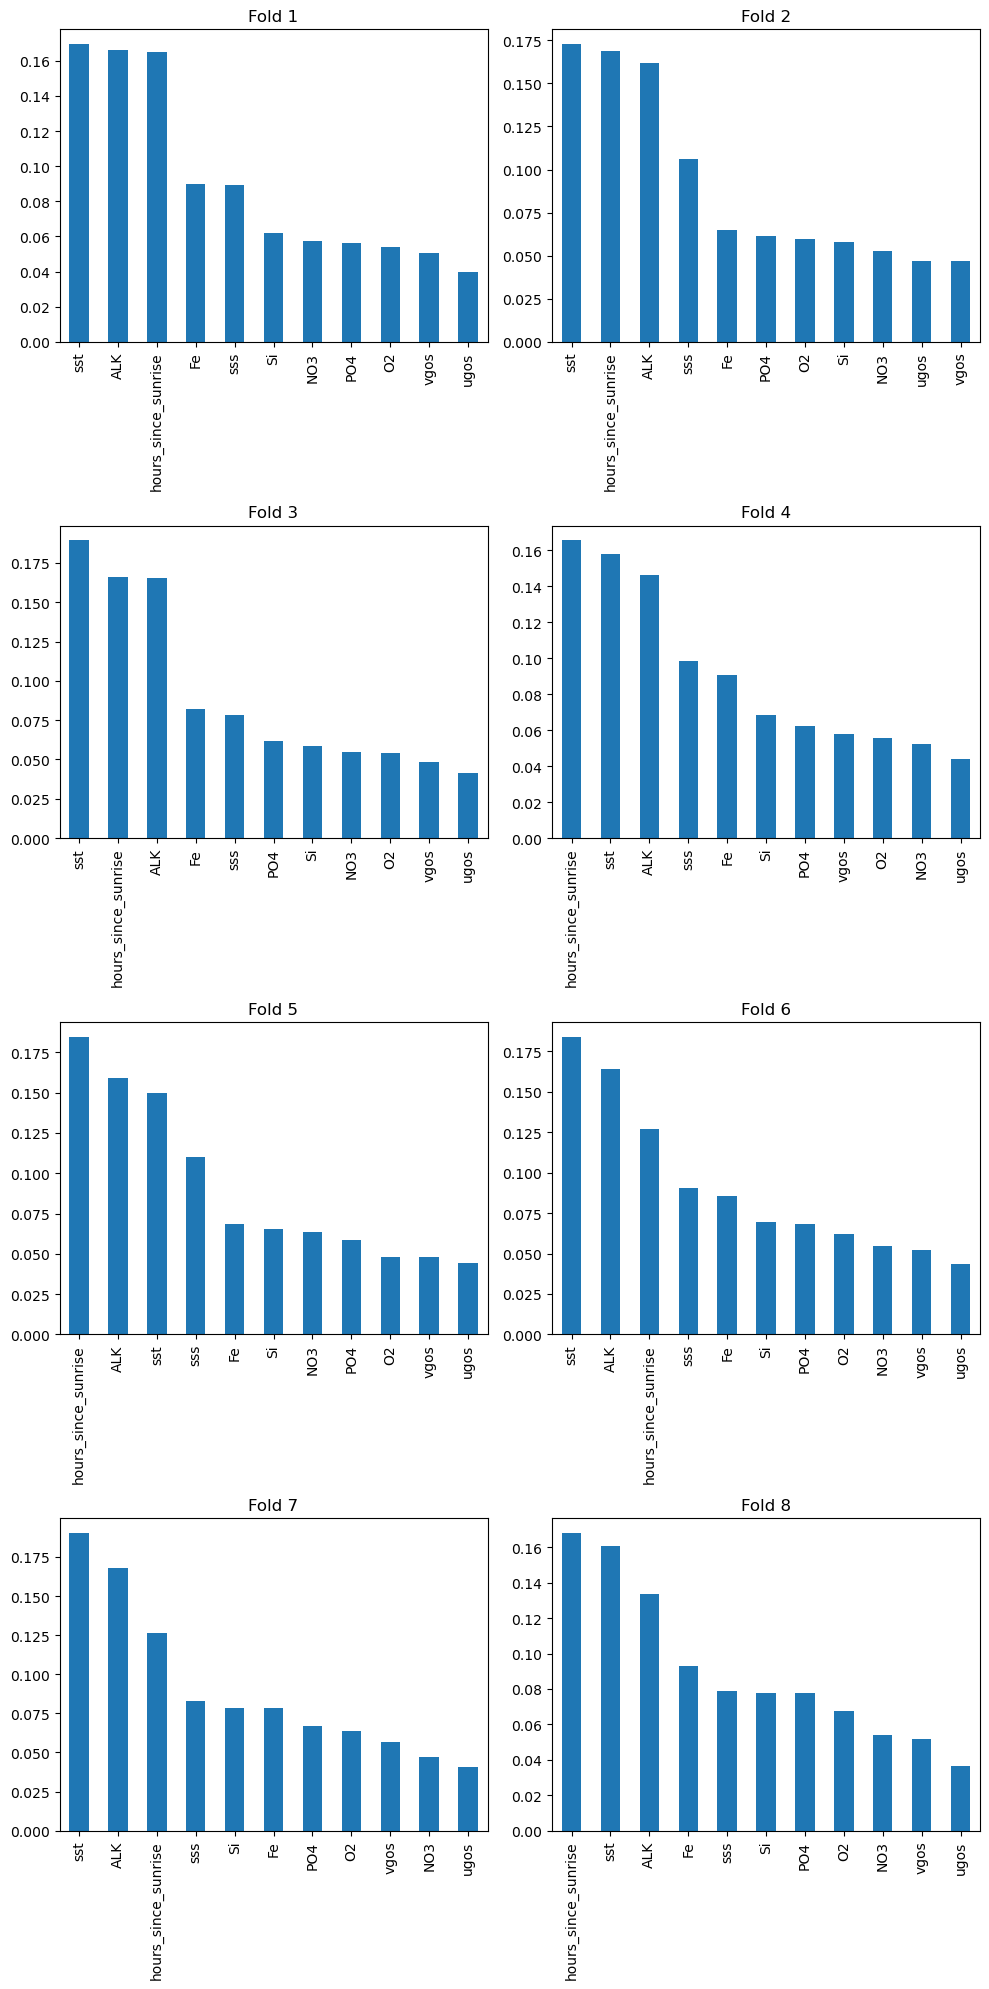

In [7]:
feature_importance()

In [8]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

#### Removing the geostrophic current variables 'ugos' and 'vgos' as they were the lowest performing variables

In [9]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['ugos', 'vgos'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)


In [10]:
predict_cruise(hyperparameters)

                            0         1         2         3         4  \
sst                  0.202893  0.195759  0.214660  0.185579  0.179148   
ALK                  0.179986  0.184246  0.190060  0.171221  0.177566   
hours_since_sunrise  0.179140  0.187798  0.179654  0.179222  0.198793   
sss                  0.097006  0.119674  0.084331  0.104713  0.117582   
Fe                   0.091964  0.070640  0.091428  0.109213  0.071849   
NO3                  0.072128  0.057984  0.058597  0.057817  0.073183   
Si                   0.064451  0.060815  0.060601  0.065312  0.064285   
PO4                  0.056331  0.062137  0.065118  0.064660  0.063794   
O2                   0.056103  0.060948  0.055550  0.062264  0.053800   

                            5         6         7  
sst                  0.208974  0.217646  0.186948  
ALK                  0.182572  0.189552  0.143273  
hours_since_sunrise  0.139313  0.140548  0.185408  
sss                  0.103639  0.090254  0.085586  
Fe       

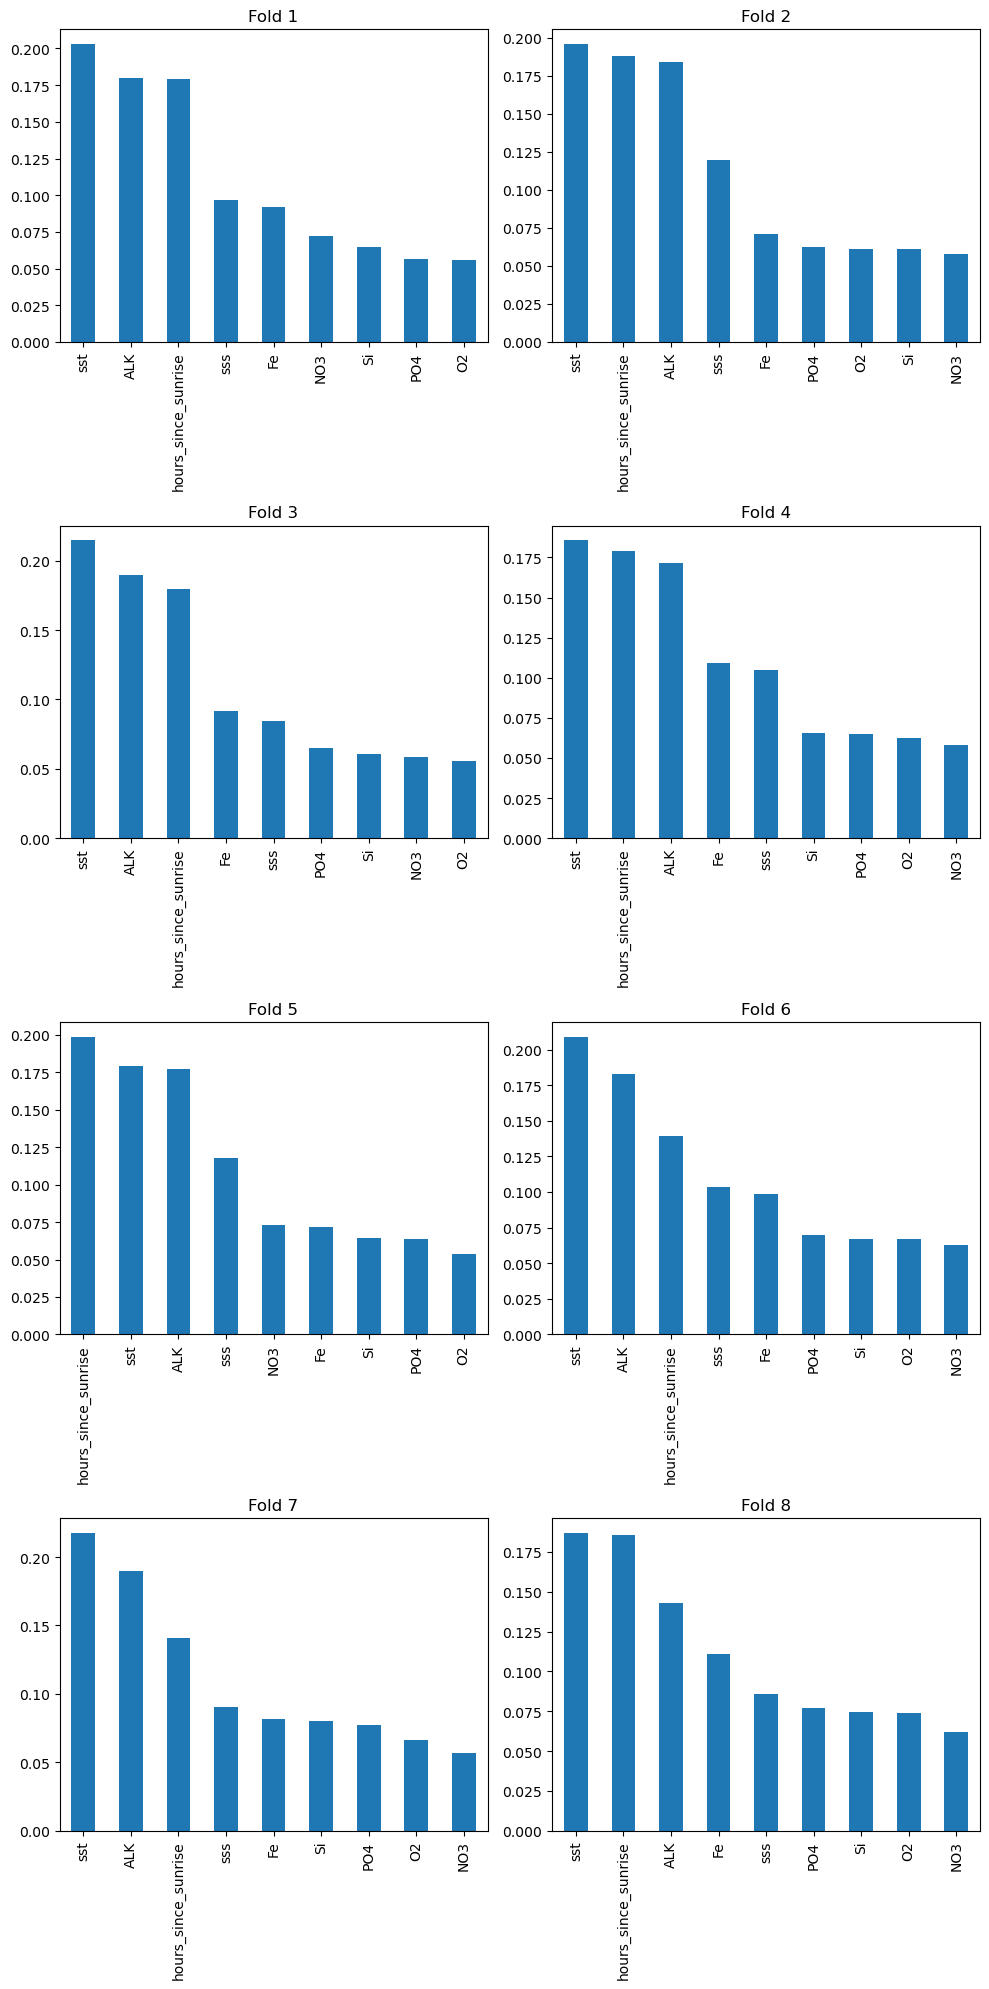

In [11]:
feature_importance()

In [12]:
predictions, maes, rmses, geos_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

####  Removing O2 and NO3 in addition to ugos and vgos, as they were the worst performing nutrients

In [13]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['NO3', 'O2'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)


In [14]:
predict_cruise(hyperparameters)

                            0         1         2         3         4  \
sst                  0.207440  0.206230  0.215258  0.193251  0.180365   
ALK                  0.182189  0.187559  0.191614  0.174724  0.183439   
hours_since_sunrise  0.178619  0.185660  0.179298  0.179669  0.198594   
Fe                   0.121904  0.100618  0.114660  0.128812  0.099887   
sss                  0.116942  0.128123  0.104817  0.120759  0.138278   
PO4                  0.097161  0.098503  0.106059  0.099201  0.098123   
Si                   0.095746  0.093307  0.088294  0.103584  0.101316   

                            5         6         7  
sst                  0.212902  0.217862  0.198829  
ALK                  0.192332  0.199102  0.160219  
hours_since_sunrise  0.139185  0.141813  0.181520  
Fe                   0.120383  0.105399  0.129157  
sss                  0.121461  0.107334  0.101126  
PO4                  0.105598  0.111981  0.114489  
Si                   0.108139  0.116509  0.114660  

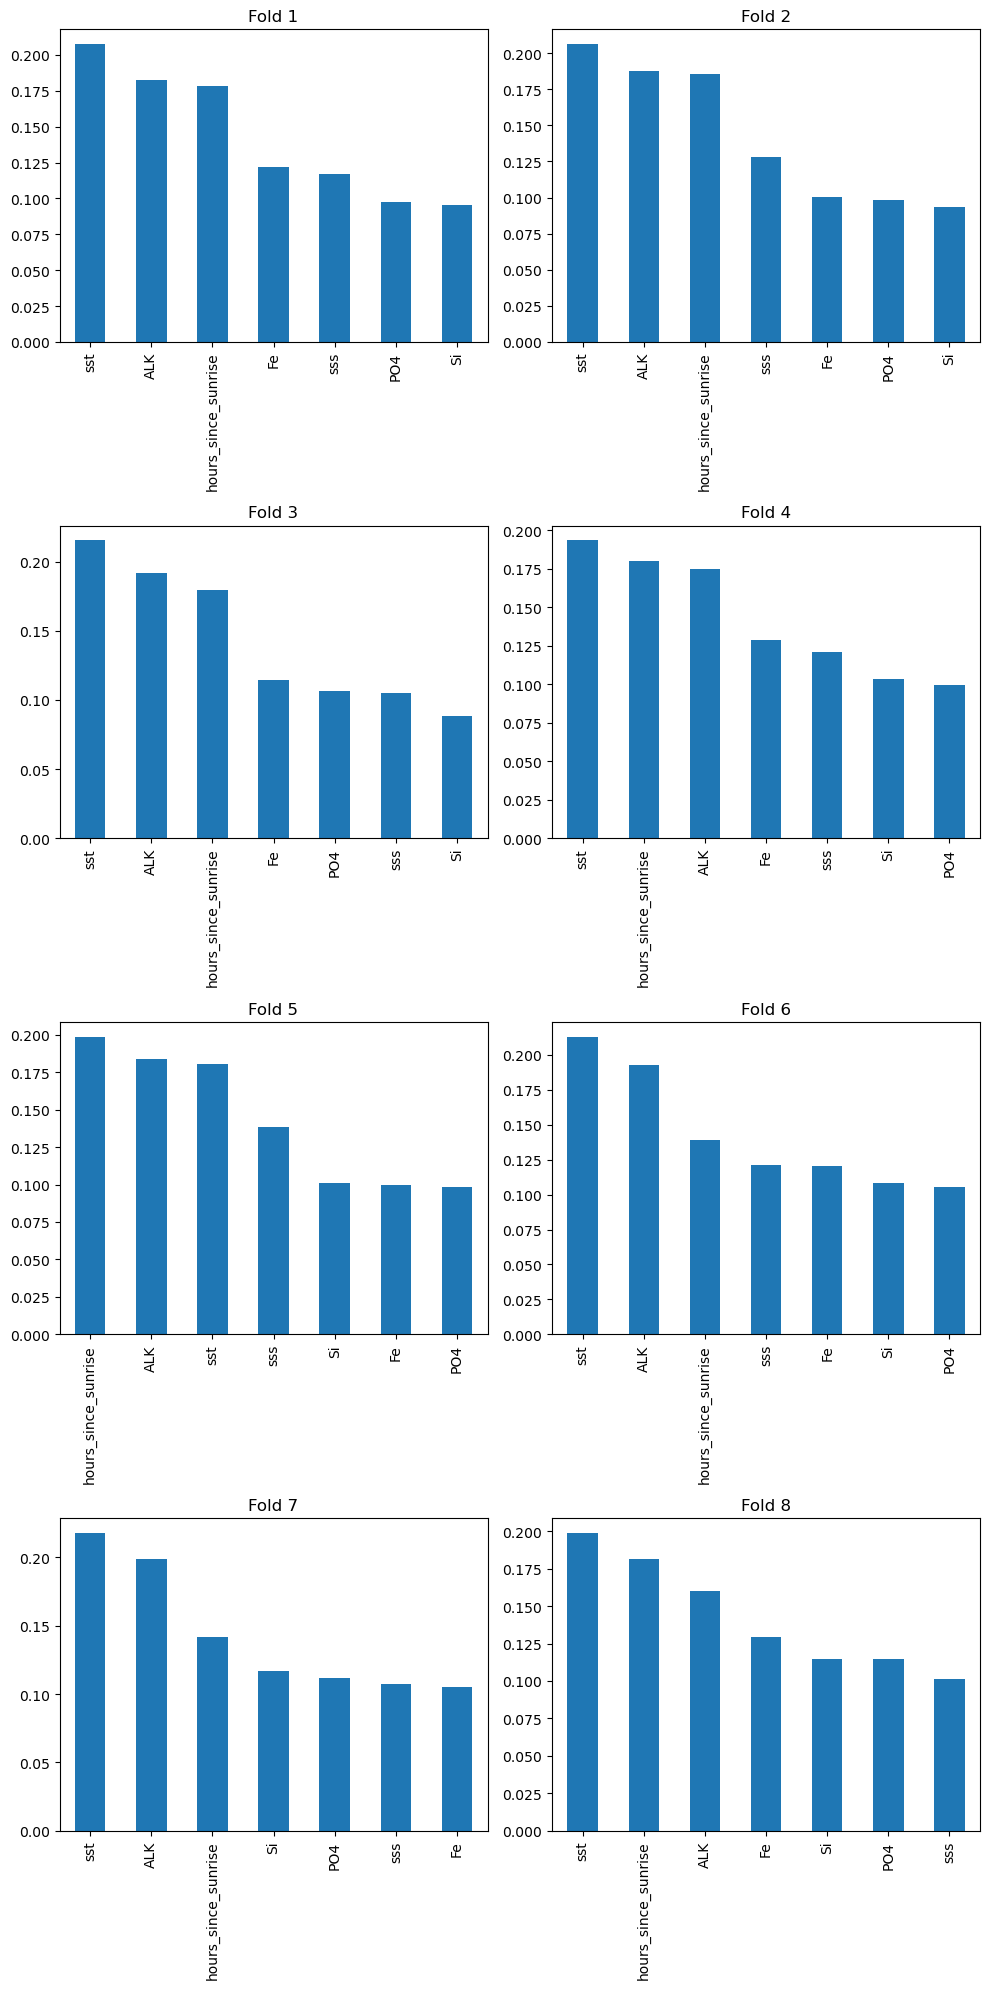

In [15]:
feature_importance()

In [16]:
predictions, maes, rmses, nutrient_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

#### Now we will see whether removing features with low importance improves the accuracy of the model

In [17]:
list_of_rmse = {'original': old_rmse, 
                'geostrophic': geos_rmse, 
                'nutrients': nutrient_rmse}
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['nutrients'])/sorted_rmse['original'] * 100, '%' )

{'nutrients': 2.8842622847067516, 'original': 2.916746055608746, 'geostrophic': 2.937580691114026}
the percent improvement is: 1.1136989742226524 %


####  Although not a big difference, removing those 4 variables had a ~1% improvement in model performance.  
#### Now we will try removing everything but the 5 highest performing variables, which are ALK, SSS, SST, Hours, and Fe

In [18]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['Si', 'PO4'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [19]:
predict_cruise(hyperparameters)

                            0         1         2         3         4  \
sst                  0.254853  0.249273  0.259718  0.245820  0.230621   
ALK                  0.227160  0.235335  0.241833  0.211598  0.223332   
hours_since_sunrise  0.200722  0.206683  0.199210  0.200605  0.219427   
Fe                   0.181668  0.152874  0.179477  0.192547  0.161865   
sss                  0.135596  0.155835  0.119763  0.149429  0.164755   

                            5         6         7  
sst                  0.261488  0.276298  0.250817  
ALK                  0.240853  0.248106  0.200660  
hours_since_sunrise  0.163182  0.158717  0.205603  
Fe                   0.186559  0.173649  0.209780  
sss                  0.147918  0.143231  0.133140  
<class 'pandas.core.frame.DataFrame'>


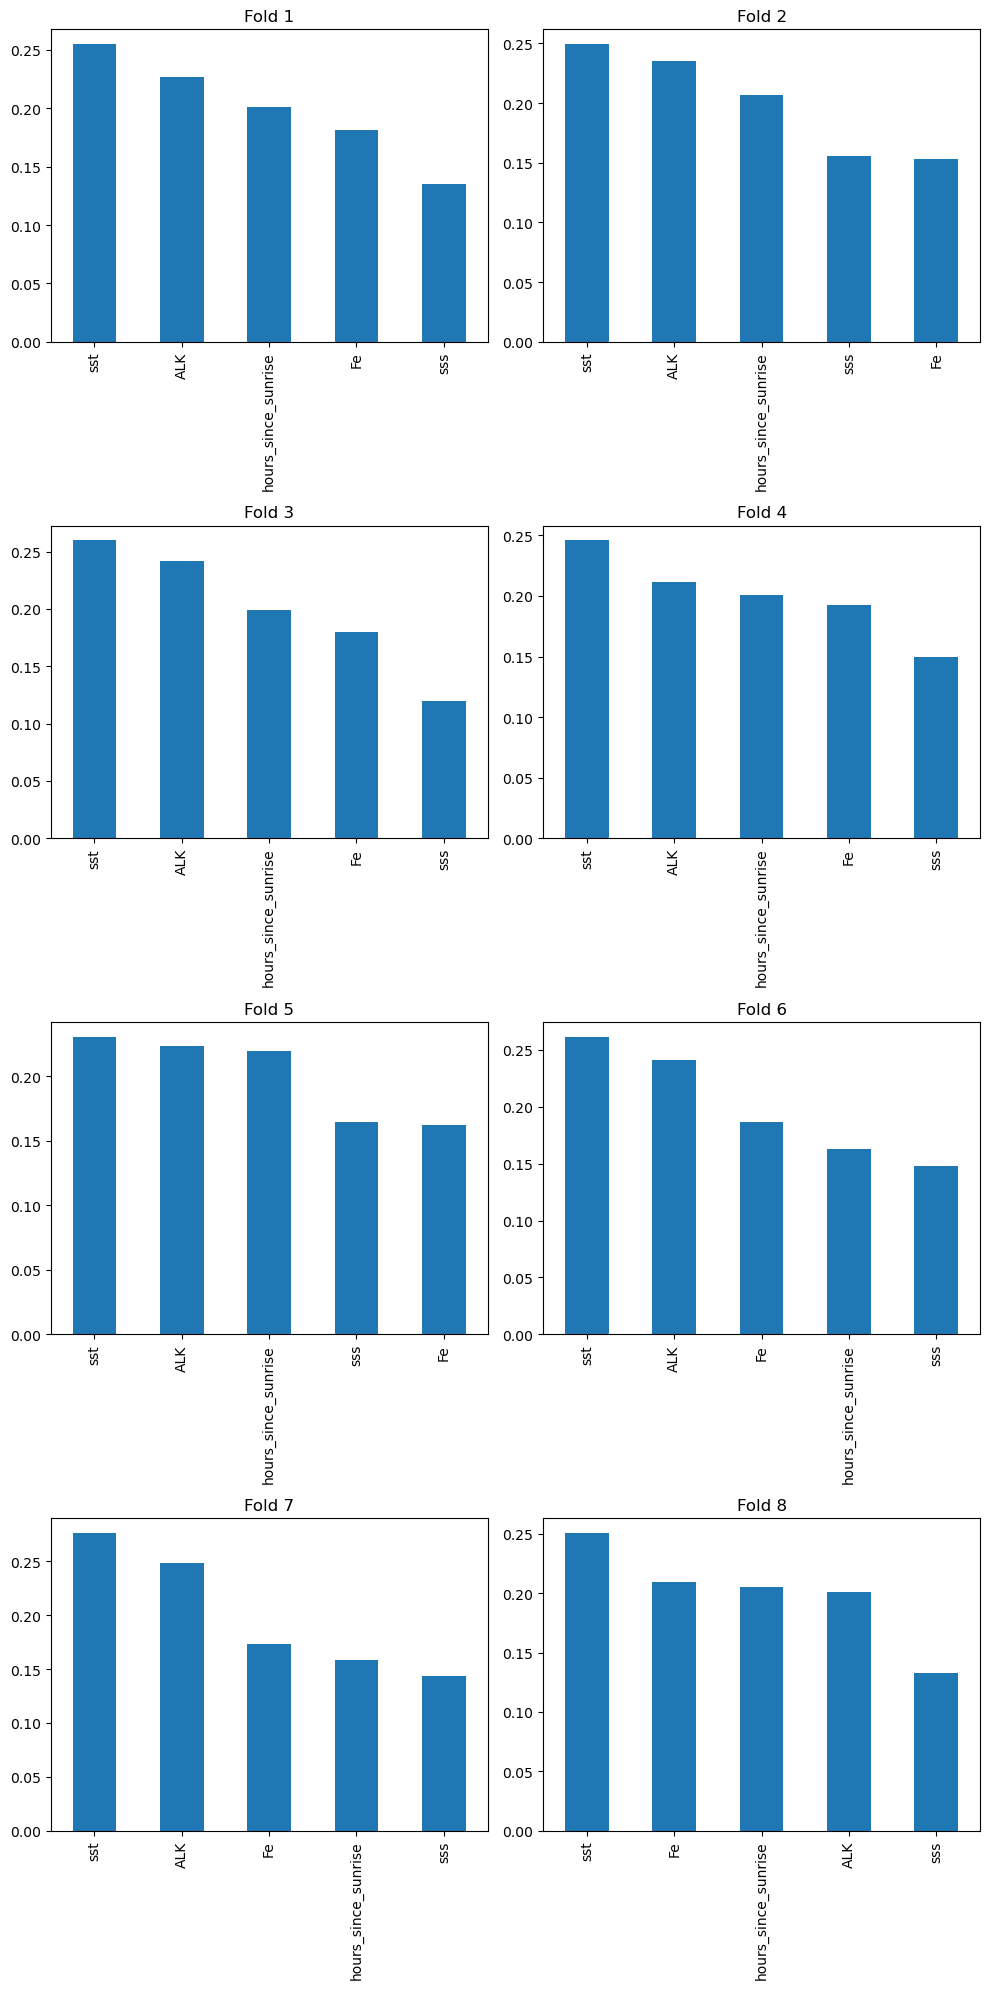

In [20]:
feature_importance()

In [21]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

In [22]:
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.860722037399678, 'nutrients': 2.8842622847067516, 'original': 2.916746055608746, 'geostrophic': 2.937580691114026}
the percent improvement is: 1.9207711998559733 %
